In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt

Compiling complete dataframe

In [3]:
df_lsa_elbow = pd.read_csv("df_lsa_elbow.csv")

In [4]:
df_no_lsa = pd.read_csv("df_final_mlp.csv")

In [5]:
df_no_lsa = df_no_lsa.drop(['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'lsa_5',
 'lsa_6',
 'lsa_7',
 'lsa_8',
 'lsa_9',
 'lsa_10',
 'lsa_11',
 'lsa_12',
 'lsa_13',
 'lsa_14',
 'lsa_15',
 'lsa_16',
 'lsa_17',
 'lsa_18',
 'lsa_19',
 'lsa_20',
 'lsa_21',
 'lsa_22',
 'lsa_23',
 'lsa_24',
 'lsa_25',
 'lsa_26',
 'lsa_27',
 'lsa_28',
 'lsa_29',
 'lsa_30'], axis = 1)

In [6]:
df_no_lsa

,hybrid,indica,sativa,anxiety,anxious,aroused,arthritis,creative,depression,dizzy,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,1,0,0,0,0,0,0,0,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,1,0,0,0,0,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,1,0,0,0,0,1,0,1,0,1,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,1,0,0,0,0,0,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0,1,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


In [7]:
df_rf = pd.concat([df_lsa_elbow, df_no_lsa], axis = 1)

In [8]:
df_rf.columns.to_list()

['lsa_0',
 'lsa_1',
 'lsa_2',
 'lsa_3',
 'lsa_4',
 'hybrid',
 'indica',
 'sativa',
 'anxiety',
 'anxious',
 'aroused',
 'arthritis',
 'creative',
 'depression',
 'dizzy',
 'dry eyes',
 'dry mouth',
 'energetic',
 'epilepsy',
 'euphoric',
 'eye pressure',
 'fatigue',
 'focused',
 'giggly',
 'happy',
 'headache',
 'hungry',
 'migraines',
 'pain',
 'paranoid',
 'relaxed',
 'seizures',
 'sleepy',
 'spasticity',
 'stress',
 'talkative',
 'tingly',
 'uplifted',
 'ammonia',
 'apple',
 'apricot',
 'berry',
 'blue cheese',
 'blueberry',
 'butter',
 'cheese',
 'chemical',
 'chestnut',
 'citrus',
 'coffee',
 'diesel',
 'earthy',
 'flowery',
 'fruit',
 'grape',
 'grapefruit',
 'honey',
 'lavender',
 'lemon',
 'lime',
 'mango',
 'menthol',
 'mint',
 'nutty',
 'orange',
 'peach',
 'pear',
 'pepper',
 'pine',
 'pineapple',
 'plum',
 'pungent',
 'rose',
 'sage',
 'skunk',
 'spicy/herbal',
 'strawberry',
 'sweet',
 'tar',
 'tea',
 'tobacco',
 'tree',
 'tropical',
 'vanilla',
 'violet',
 'woody',
 'X..D

In [9]:
df_rf

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,sativa,anxiety,anxious,...,X..3-Carene,X..Alpha-Terpinene,X..Ocimene,X..Eucalyptol,X..Terpinolene,X..Isopulegol,X..Geraniol,X..Guaiol,X..CaryophylleneOxide,X..Alpha-Bisabolol
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,...,1.0,0.75,0.0,0.0,1.0,0.0,0.0,0.444444,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263
42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,0,0,0,...,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.222222,0.0,0.105263


Splitting dependent and independent variables

In [10]:
X = df_rf.drop(['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol'], axis = 1)
y = df_rf[['X..Delta9-THC',
 'X..CBD',
 'X..CBN',
 'X..CBG',
 'X..CBC',
 'X..THCV',
 'X..D-Limonene',
 'X..Beta-Ocimene',
 'X..Beta-Myrcene',
 'X..Beta-Pinene',
 'X..Linalool',
 'X..Alpha-Pinene',
 'X..Camphene',
 'X..3-Carene',
 'X..Alpha-Terpinene',
 'X..Ocimene',
 'X..Eucalyptol',
 'X..Terpinolene',
 'X..Isopulegol',
 'X..Geraniol',
 'X..Guaiol',
 'X..CaryophylleneOxide',
 'X..Alpha-Bisabolol']]

Plotting histograms on target variable

In [11]:
y_array = y.to_numpy()
y_array

array([[0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       [0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       [0.25971245, 0.00104646, 0.13793103, ..., 0.44444444, 0.        ,
        0.        ],
       ...,
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316],
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316],
       [0.56255736, 0.00104646, 0.10344828, ..., 0.22222222, 0.        ,
        0.10526316]])

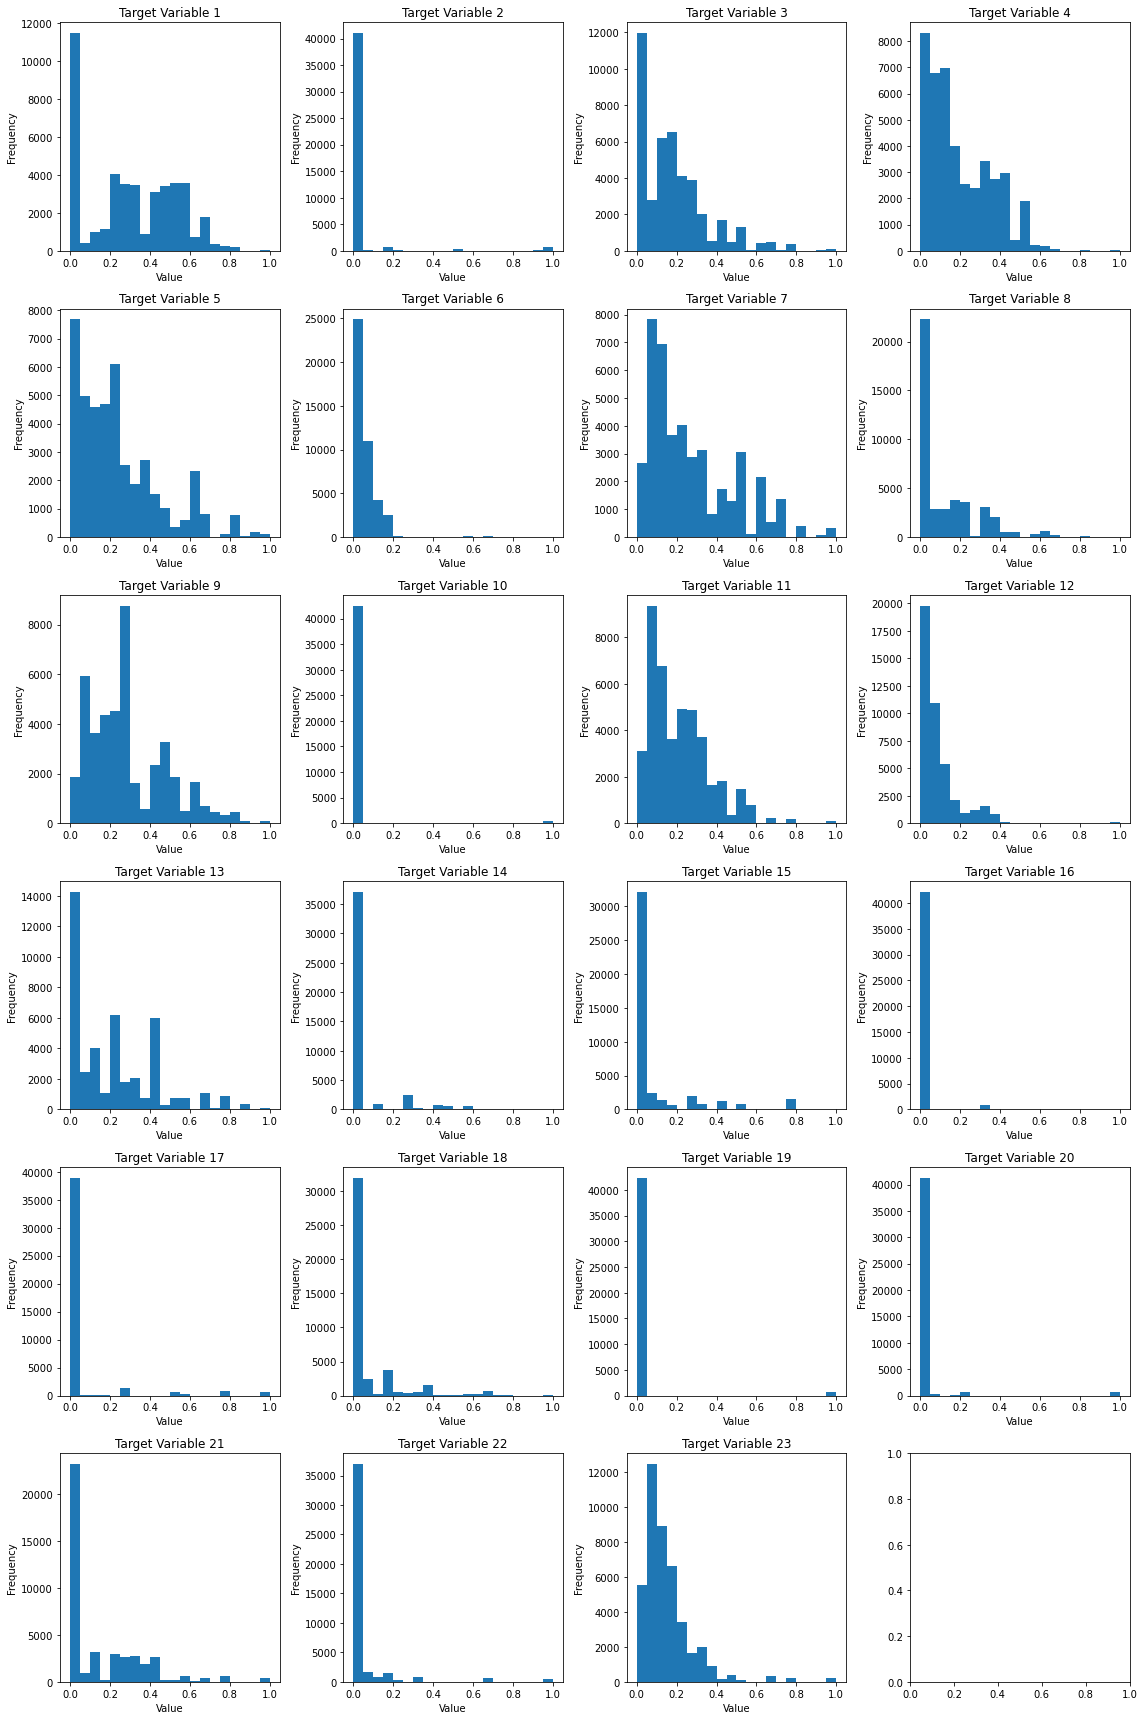

<Figure size 432x288 with 0 Axes>

In [12]:
# create a figure with subplots
fig, axs = plt.subplots(6, 4, figsize=(16, 24))

# create histograms for each target variable
for i in range(23):
    row = i // 4
    col = i % 4
    axs[row, col].hist(y_array[:, i], bins=20)
    axs[row, col].set_title('Target Variable {}'.format(i+1))
    axs[row, col].set_xlabel('Value')
    axs[row, col].set_ylabel('Frequency')

# adjust the layout and display the figure
plt.tight_layout()
plt.show()

plt.savefig("target imbalanced.pdf")

Train test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2)

In [14]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.25)

RF modeling (before Feature selection and Hyperparameter Tuning)

In [15]:
rfreg = RandomForestRegressor(n_jobs = -1)
rfreg.fit(X_train1, y_train1)

RandomForestRegressor(n_jobs=-1)

In [16]:
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [17]:
mean_absolute_error(y_val, y_pred_rfreg)

0.06942527469580555

In [18]:
mean_squared_error(y_val, y_pred_rfreg)

0.01674739424541748

In [19]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.12399875178455677

In [20]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.896689161019799

In [21]:
#val
r2_score(y_val, y_pred_rfreg)

0.33628196777975533

Residual plots for each target variable

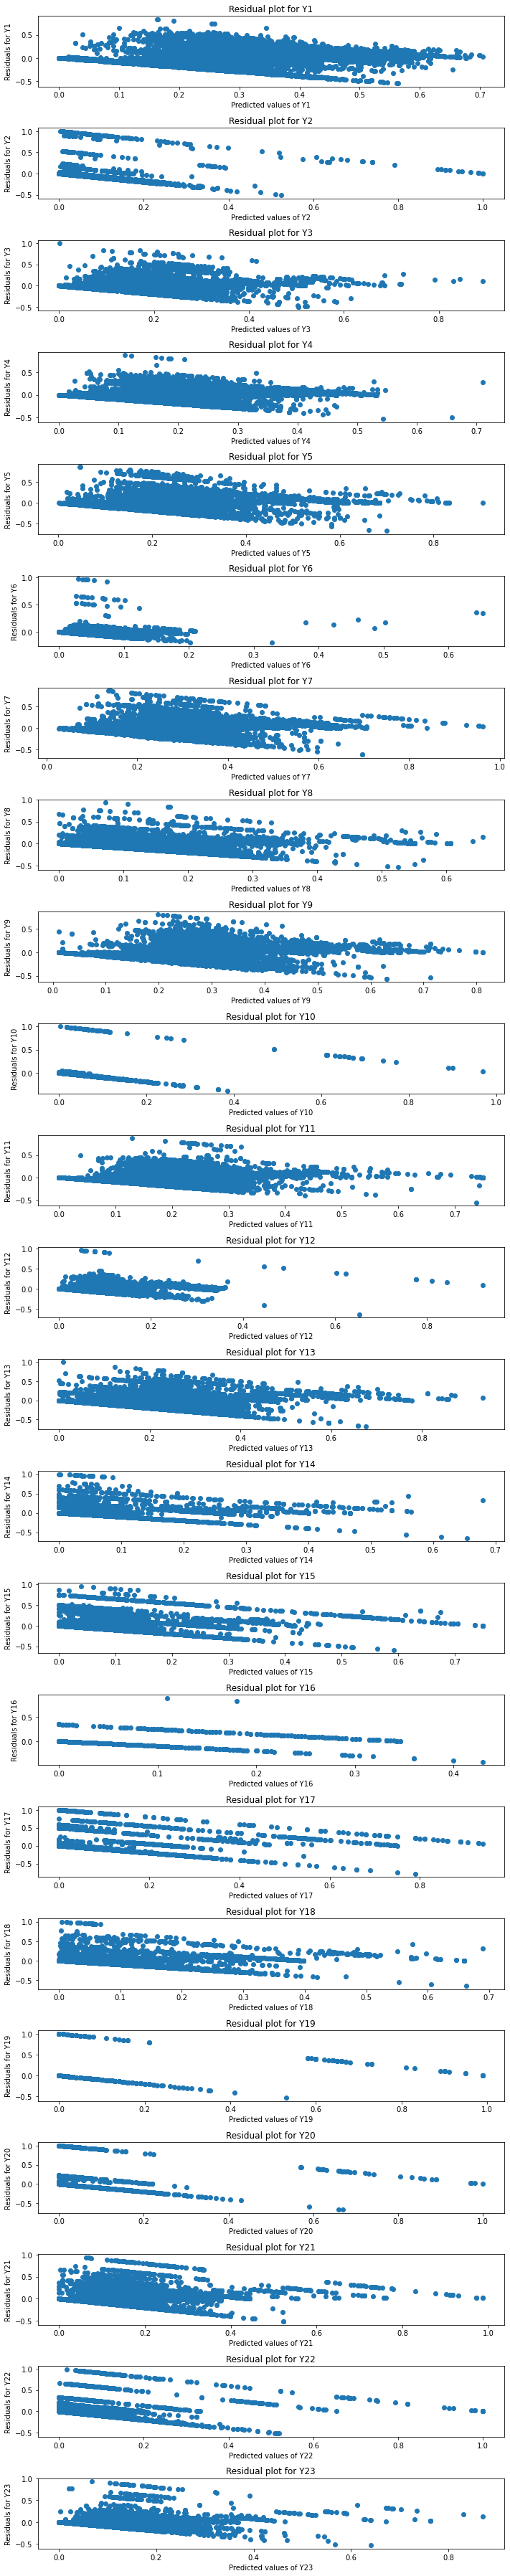

In [22]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_rfreg[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_rfreg[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Feature Selection

In [23]:
df_feat = pd.DataFrame({
    "features": X_train1.columns,
    "score": rfreg.feature_importances_
})

In [24]:
df_feat

,features,score
0,lsa_0,0.116721
1,lsa_1,0.110289
2,lsa_2,0.116408
3,lsa_3,0.116020
4,lsa_4,0.116374
...,...,...
81,tree,0.001589
82,tropical,0.002872
83,vanilla,0.013567
84,violet,0.000616


In [25]:
df_feat_ranked = df_feat.sort_values("score", ascending=False)

In [26]:
pd.set_option('display.max_rows', df_feat_ranked.shape[0]+1)
df_feat_ranked

,features,score
0,lsa_0,0.116721
2,lsa_2,0.116408
4,lsa_4,0.116374
3,lsa_3,0.116020
1,lsa_1,0.110289
6,indica,0.026054
50,diesel,0.016785
58,lemon,0.015156
30,relaxed,0.013672
83,vanilla,0.013567


In [27]:
selector = SelectFromModel(rfreg).fit(X_train1, y_train1)

In [28]:
selector.estimator_.feature_importances_

array([1.15997504e-01, 1.10071893e-01, 1.16140032e-01, 1.16422524e-01,
       1.15837452e-01, 1.24216490e-02, 2.62500762e-02, 4.89802718e-03,
       3.06258166e-04, 3.94239968e-03, 7.01009431e-03, 3.98908386e-05,
       1.06494918e-02, 3.31462609e-04, 5.58376638e-03, 7.87153273e-03,
       1.04440367e-02, 9.78091251e-03, 4.49970909e-05, 1.15672321e-02,
       3.13496856e-05, 3.26308319e-05, 1.08964212e-02, 8.82105547e-03,
       1.26252256e-02, 3.61904728e-03, 1.00878358e-02, 3.44846186e-04,
       3.35412087e-05, 4.15223078e-03, 1.35502040e-02, 2.21279303e-05,
       1.03475496e-02, 2.76153985e-06, 0.00000000e+00, 8.86844271e-03,
       8.95525505e-03, 1.21261090e-02, 1.56975154e-03, 7.95349678e-04,
       3.31240039e-04, 7.19698247e-03, 4.31008949e-04, 1.06732868e-02,
       9.16123470e-04, 7.65367052e-03, 2.17263239e-03, 6.92095444e-04,
       8.48145763e-03, 2.64069501e-03, 1.68246454e-02, 1.15759414e-02,
       5.58618281e-03, 2.03597722e-03, 6.14763282e-03, 1.06431102e-03,
      

In [29]:
selector.threshold_

0.011627906976744186

In [30]:
mask = selector.get_support()

In [31]:
mask

array([ True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False])

In [32]:
selected_features = X.columns[mask]

In [33]:
selected_X = df_rf[selected_features]
selected_X

,lsa_0,lsa_1,lsa_2,lsa_3,lsa_4,hybrid,indica,happy,relaxed,uplifted,diesel,lemon,vanilla
0,0.341025,0.182753,0.008214,0.140406,-0.156943,1,0,0,1,0,0,0,0
1,0.232158,-0.045496,0.187131,-0.000936,0.018518,1,0,1,1,1,0,0,1
2,0.261225,0.100324,-0.043622,0.141860,-0.034786,1,0,1,0,0,0,0,1
3,0.243491,0.034313,0.080290,-0.165609,0.019773,1,0,0,1,1,0,0,0
4,0.238648,-0.048758,-0.107398,-0.067096,-0.006558,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
42972,0.181714,-0.045560,-0.055692,0.015649,-0.045585,0,1,1,1,0,0,0,0
42973,0.055494,0.003622,-0.050252,-0.024795,-0.031141,0,1,0,0,0,0,0,0
42974,0.000000,0.000000,0.000000,0.000000,0.000000,0,1,0,0,0,0,0,0
42975,0.324915,0.131823,-0.099424,0.065491,0.038437,0,1,1,1,1,0,0,0


Train test split (after Feature Selection)

In [34]:
import joblib

joblib.dump(selector, "selector_rf_lsa_elbow.pkl")
joblib.dump(selected_X, "selected_X_rf_lsa_elbow.pkl")
joblib.dump(rfreg, "rfreg_lsa_elbow.pkl")

['rfreg_lsa_elbow.pkl']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(selected_X, y, random_state=1, test_size=0.2)

In [36]:
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, random_state=1, test_size=0.2)

In [37]:
rfreg.fit(X_train1, y_train1)
y_pred_rfreg = rfreg.predict(X_val)
y_pred_rfreg_r2 = rfreg.predict(X_train1)

In [38]:
mean_absolute_error(y_val, y_pred_rfreg)

0.07413007355332459

In [39]:
mean_squared_error(y_val, y_pred_rfreg)

0.01770669914520801

In [40]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.1275385651156996

In [41]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.8787478414340448

In [42]:
#val
r2_score(y_val, y_pred_rfreg)

0.2940057568574249

Hyperparameter Tuning

In [43]:
parameters = { 'max_depth': [None, 10, 50, 100],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 300, 500]}

In [44]:
X_train1_subset = X_train1.to_numpy()[:1000, :]
y_train1_subset = y_train1[:1000]

In [45]:
rscv = RandomizedSearchCV(rfreg,  
                     parameters,   
                     cv=5, 
                     scoring='neg_mean_absolute_error',
                     n_jobs= -1)

In [46]:
rscv.fit(X_train1_subset, y_train1_subset)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [47]:
rscv.best_params_

{'n_estimators': 500,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 50}

In [48]:
rscv.fit(X_train1, y_train1)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 50, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 300, 500]},
                   scoring='neg_mean_absolute_error')

In [49]:
rscv.best_params_

{'n_estimators': 100,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [50]:
joblib.dump(rscv, "rscv_rf_lsa_elbow.pkl")
joblib.dump(rscv.best_params_, "rscv_rf_lsa_elbow_best_params.pkl")

['rscv_rf_lsa_elbow_best_params.pkl']

RF (after Hyperparameter Tuning)

In [51]:
rfreg_ht = RandomForestRegressor(n_estimators = 100, min_samples_split = 2, max_features = 'sqrt', min_samples_leaf = 1, max_depth = 50)
rfreg_ht.fit(X_train1, y_train1)
y_pred_rfreg = rfreg_ht.predict(X_val)
y_pred_rfreg_r2 = rfreg_ht.predict(X_train1)

In [52]:
mean_absolute_error(y_val, y_pred_rfreg)

0.07394343858508527

In [53]:
mean_squared_error(y_val, y_pred_rfreg)

0.017619135950499066

In [54]:
mean_squared_error(y_val, y_pred_rfreg, squared = False)

0.1272184547050364

In [55]:
#train
r2_score(y_train1, y_pred_rfreg_r2)

0.8791115085089795

In [56]:
#val
r2_score(y_val, y_pred_rfreg)

0.2973527311674081

Residual plots after Hyperparameter Tuning

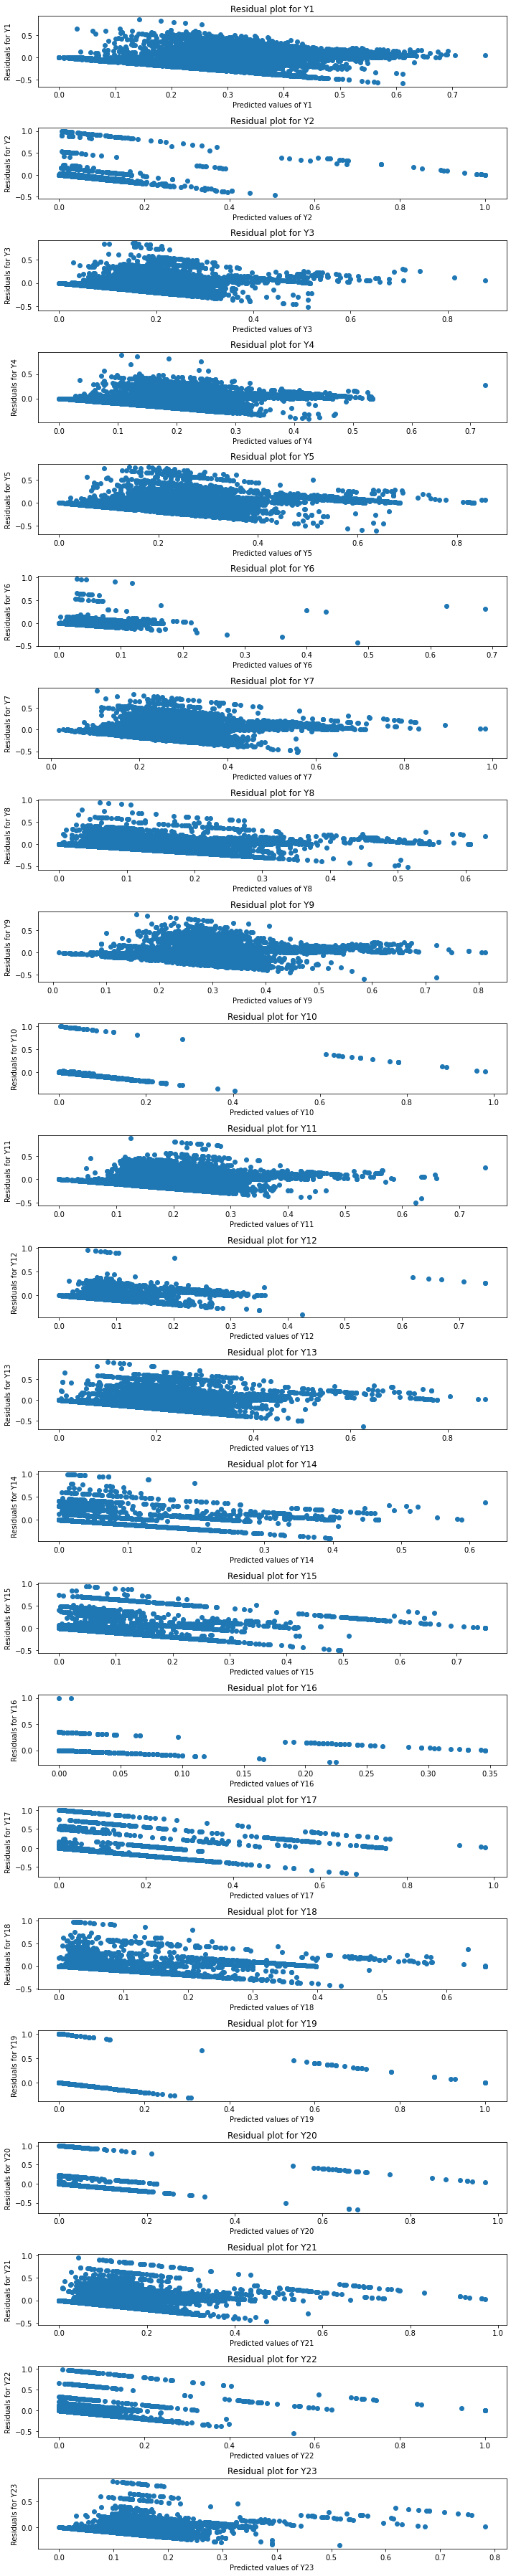

In [57]:
# Create residual plots for each target variable
num_targets = y_val.shape[1]  # 23 target variables
fig, axs = plt.subplots(num_targets, 1, figsize=(10, 50))

for i in range(num_targets):
    # Calculate residuals for target variable i
    #Y_predicted = model.predict(X)
    #Y_residuals = Y.iloc[:, i] - Y_predicted[:, i]
    #print(y_pred_knreg)
    y_residuals = y_val.iloc[:, i] - y_pred_rfreg[:, i]
    # Create scatter plot of residuals against predicted values
    axs[i].scatter(y_pred_rfreg[:, i], y_residuals)
    axs[i].set_xlabel('Predicted values of Y' + str(i+1))
    axs[i].set_ylabel('Residuals for Y' + str(i+1))
    axs[i].set_title('Residual plot for Y' + str(i+1))
    
plt.tight_layout()
plt.show()

Predicting model on the test set

In [58]:
y_pred_rfreg_test = rfreg_ht.predict(X_test)

In [59]:
joblib.dump(y_pred_rfreg_test, "y_pred_rfreg_test_lsa_elbow.pkl")
joblib.dump(y_test, "y_test_rfreg_lsa_elbow.pkl")

['y_test_rfreg_lsa_elbow.pkl']

In [60]:
mean_absolute_error(y_test, y_pred_rfreg_test)

0.07461923943907425

In [62]:
mean_squared_error(y_test, y_pred_rfreg_test)

0.017965429138583393

In [63]:
mean_squared_error(y_test, y_pred_rfreg_test, squared = False)

0.12924395885905793

In [64]:
r2_score(y_test, y_pred_rfreg_test)

0.2917963069118293

Error analysis

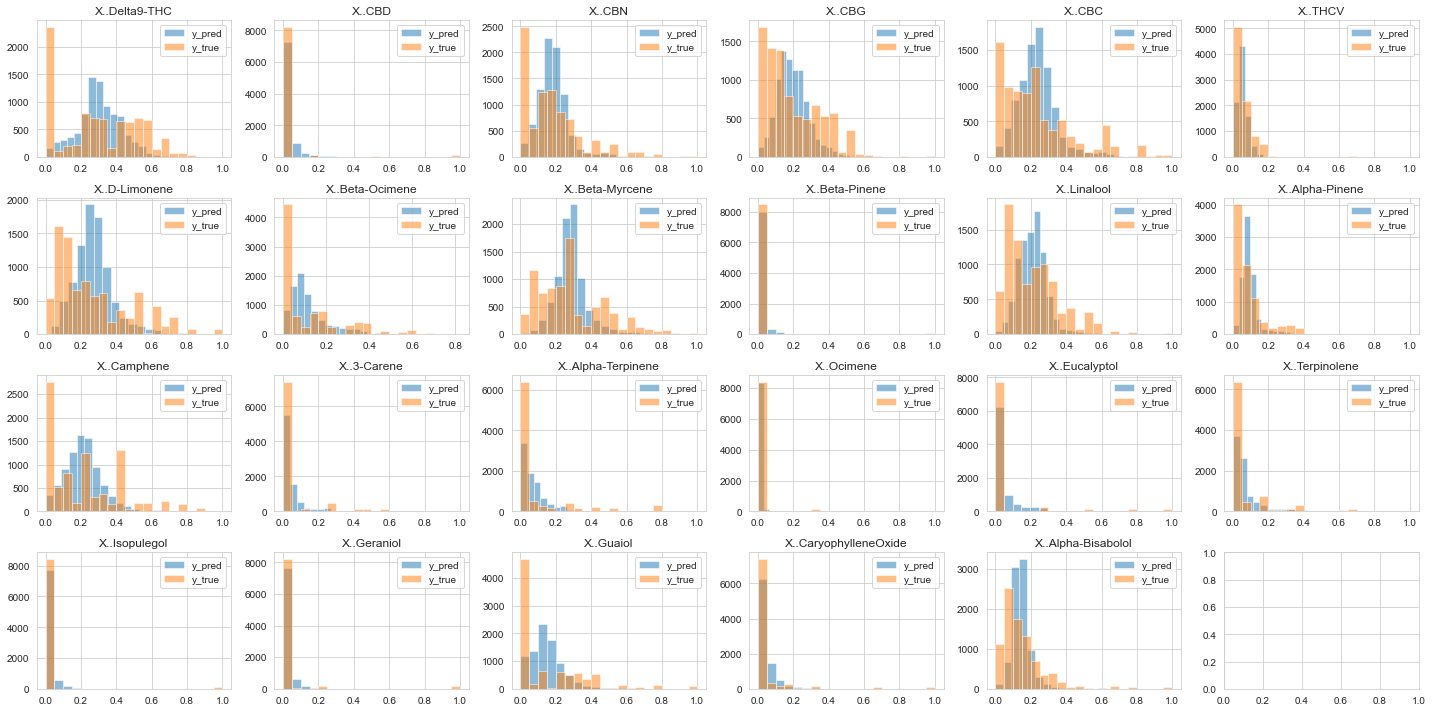

<Figure size 432x288 with 0 Axes>

In [70]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(y_pred_rfreg_test[:, i], alpha=0.5, label='y_pred', bins=20)
    axs[row, col].hist(y_test.iloc[:, i], alpha=0.5, label='y_true', bins=20)
    axs[row, col].legend(loc='upper right')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()
plt.savefig('error_hist_rf_lsa_elbow.png')

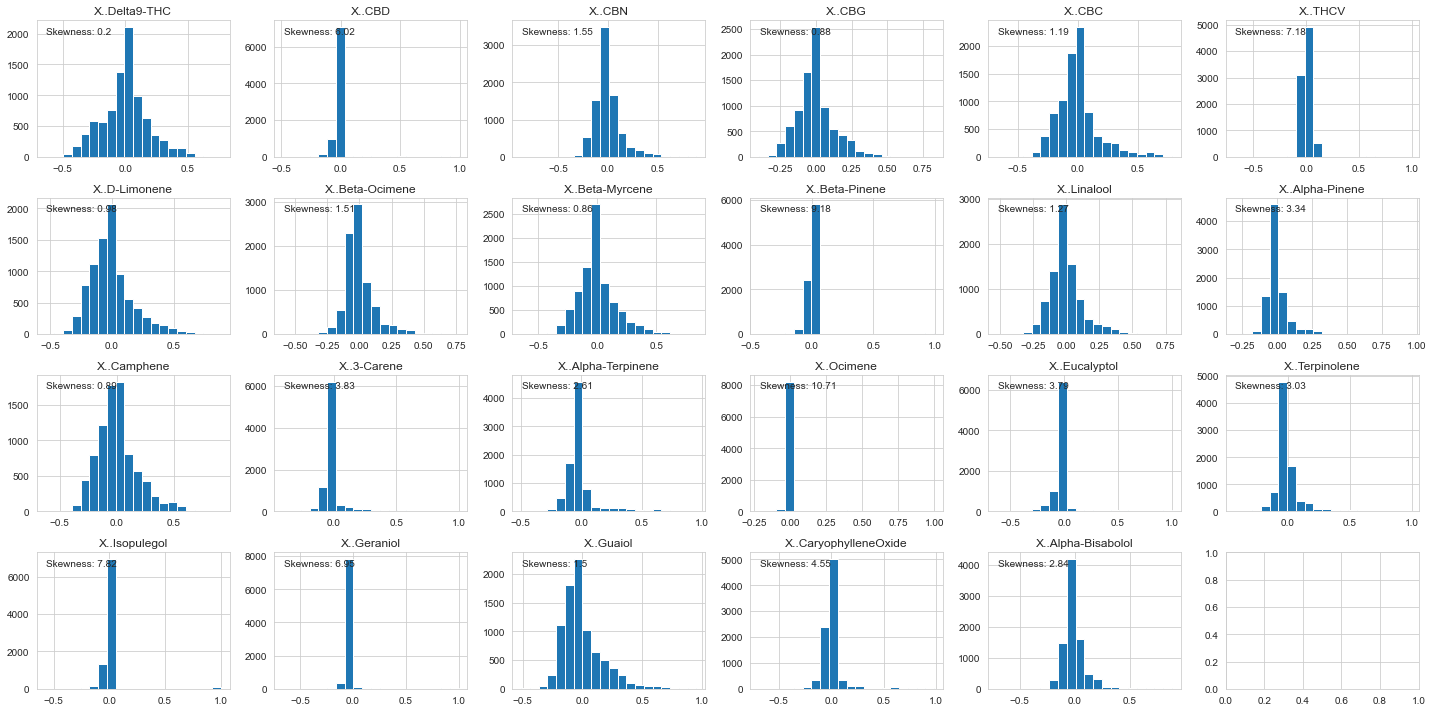

<Figure size 432x288 with 0 Axes>

In [71]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
errors = y_test - y_pred_rfreg_test
fig, axs = plt.subplots(nrows=4, ncols=6, figsize=(20, 10))

for i, column in enumerate(y_test.columns):
    row = i // 6
    col = i % 6
    axs[row, col].hist(errors.iloc[:, i], bins=20)
    axs[row, col].set_title(column)
    axs[row, col].text(0.05, 0.9, f"Skewness: {np.round(errors.iloc[:, i].skew(), 2)}", transform=axs[row, col].transAxes)

plt.tight_layout()
plt.show()
plt.savefig('error_skew_rf_lsa_elbow.png')

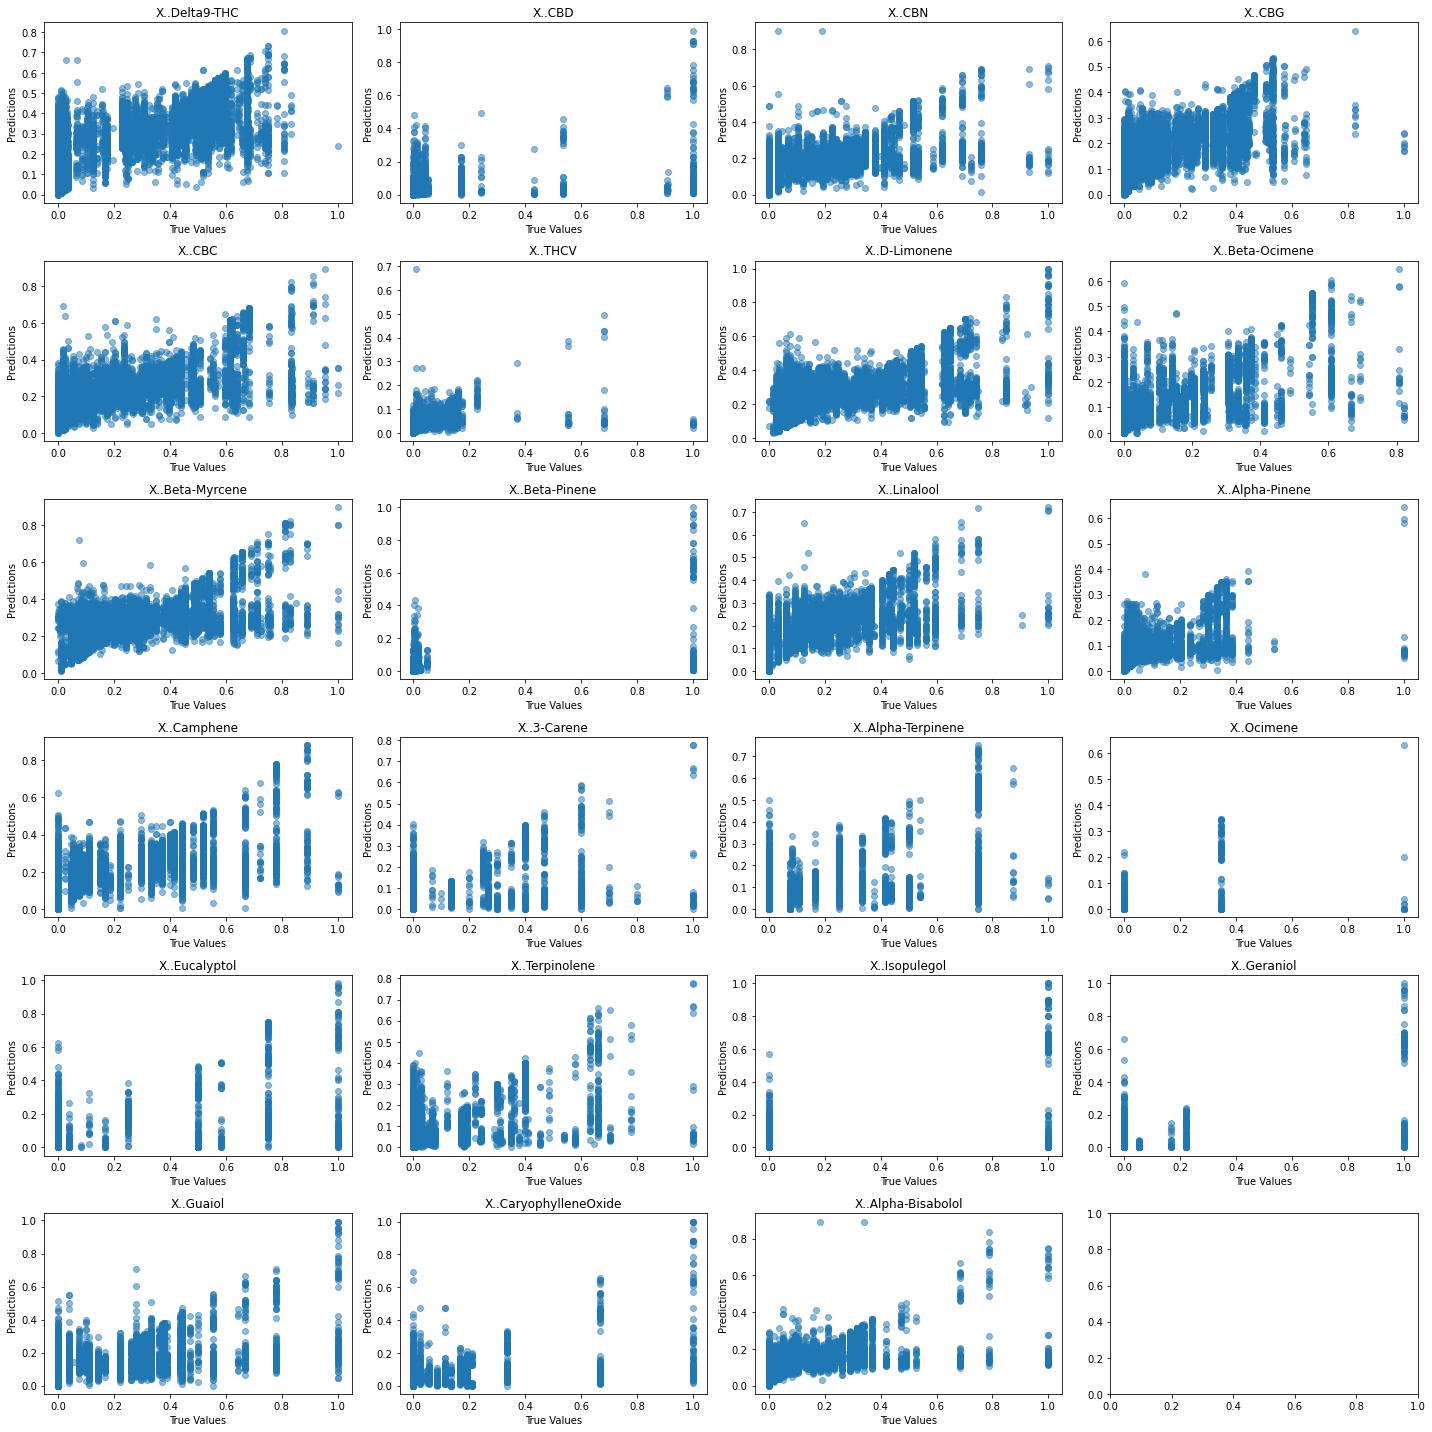

In [67]:
# assume y_pred is a numpy array and y_true is a pandas dataframe
fig, axs = plt.subplots(nrows=6, ncols=4, figsize=(20, 20))

for i, column in enumerate(y_test.columns):
    row = i // 4
    col = i % 4
    axs[row, col].scatter(y_test.iloc[:, i], y_pred_rfreg_test[:, i], alpha=0.5)
    axs[row, col].set_xlabel('True Values')
    axs[row, col].set_ylabel('Predictions')
    axs[row, col].set_title(column)

plt.tight_layout()
plt.show()

Pearson R

In [68]:
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_rfreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    print(f"Target {i}: Pearson correlation coefficient={r_i}, p-value={p_i}")

Target 0: Pearson correlation coefficient=0.5723837202520615, p-value=0.0
Target 1: Pearson correlation coefficient=0.45518544891402146, p-value=0.0
Target 2: Pearson correlation coefficient=0.5409557705691771, p-value=0.0
Target 3: Pearson correlation coefficient=0.5725237350582979, p-value=0.0
Target 4: Pearson correlation coefficient=0.5496324223669626, p-value=0.0
Target 5: Pearson correlation coefficient=0.44649974345872795, p-value=0.0
Target 6: Pearson correlation coefficient=0.5566709323179122, p-value=0.0
Target 7: Pearson correlation coefficient=0.6253690314745637, p-value=0.0
Target 8: Pearson correlation coefficient=0.5324697261688845, p-value=0.0
Target 9: Pearson correlation coefficient=0.5632441283377991, p-value=0.0
Target 10: Pearson correlation coefficient=0.5440027003410997, p-value=0.0
Target 11: Pearson correlation coefficient=0.5181583996970079, p-value=0.0
Target 12: Pearson correlation coefficient=0.5422322224746914, p-value=0.0
Target 13: Pearson correlation co

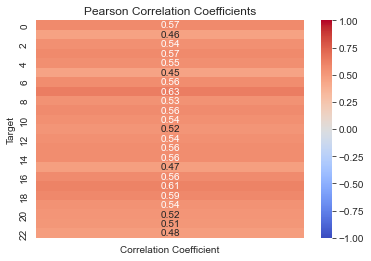

In [69]:
import seaborn as sns

results = []
for i in range(num_targets):
    true_values_i = y_test.iloc[:, i].values  # Get the true values for target i
    predicted_values_i = y_pred_rfreg_test[:, i]  # Get the predicted values for target i
    r_i, p_i = pearsonr(true_values_i, predicted_values_i)  # Calculate Pearson correlation coefficient and p-value
    results.append({
        'Target': i,
        'Correlation Coefficient': r_i,
        'P-value': p_i
    })

df = pd.DataFrame(results)

sns.set_style("whitegrid")
corr_heatmap = sns.heatmap(df.pivot_table(index='Target', columns=None, values='Correlation Coefficient'),
                           annot=True, cmap="coolwarm", center=0, vmin=-1, vmax=1)
corr_heatmap.set_title('Pearson Correlation Coefficients')

plt.savefig('pearson_heatmap_rf_lsa_elbow.png')